In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'monospace'
import numpy as np
import pandas as pd
import os
import sys
from adjustText import adjust_text
sys.path.append('..')

In [2]:
from Util import Globals
from Util import Parser

In [3]:
def collect_averages(dataset_ids):
    results = []
    for dataset_id in dataset_ids:
        inst_dict = instability_average(dataset_id)
        ar_dict = ar_average(dataset_id)

        technique_list = sorted(ar_dict)
        for i, technique in enumerate(technique_list):
            results.append([dataset_id, Globals.acronyms[technique], i, ar_dict[technique], inst_dict[technique]])

    df = pd.DataFrame(results, columns=['dataset', 'technique', 'label', 'ar', 'inst'])
    return df


def instability_average(dataset_id):
    ct_df = Parser.read_ct_metric(dataset_id)
    rpc_df = Parser.read_rpc_metric(dataset_id)

    means = {}

    technique_list = sorted(rpc_df)
    for i, technique_id in enumerate(technique_list):
        technique_means = []
        for revision in range(int(len(rpc_df[technique_id].columns) / 2)):
            r_col = 'r_' + str(revision)
            b_col = 'b_' + str(revision)
            diff = rpc_df[technique_id][[r_col, b_col]].max(axis=1) - rpc_df[technique_id][b_col]
            ct_mean = diff.dropna().mean()

            r_col = 'r_' + str(revision)
            b_col = 'b_' + str(revision)
            diff = ct_df[technique_id][[r_col, b_col]].max(axis=1) - ct_df[technique_id][b_col]
            rpc_mean = diff.dropna().mean()

            technique_means.append((ct_mean + rpc_mean) / 2)

        means[technique_id] = np.mean(technique_means)

    return means


def ar_average(dataset_id):
    ar_df = Parser.read_aspect_ratios(dataset_id)
    means = {}

    technique_list = sorted(ar_df)
    for i, technique_id in enumerate(technique_list):
        technique_means = []
        for revision in range(int(len(ar_df[technique_id].columns) / 2)):
            # df = ar_df[technique_id]
            w_col = 'w_' + str(revision)
            ar_col = 'ar_' + str(revision)

            u_avg = ar_df[technique_id][ar_col].mean(axis=0)
            w_avg = np.average(ar_df[technique_id][ar_col].dropna(), weights=ar_df[technique_id][w_col].dropna())

            technique_means.append((u_avg + w_avg)/2)

        means[technique_id] = np.mean(technique_means)

    return means

In [4]:
# dataset_ids = {'DutchNames',
#                 'gh-FlycoTabLayout-m.data',
#                 'gh-pybind11-m.data',
#                 'GitHubAnimate',
#                 'GitHubExo'}
dataset_ids = open('../tvcg-datasets.txt', 'r').readlines()
dataset_ids = [d.replace('\n','') for d in dataset_ids]

In [5]:
averages = collect_averages(dataset_ids)

In [6]:
# Remove '.data' from name
averages['dataset'] = averages['dataset'].str.replace(r'.data$', '')

In [7]:
sorted(averages['dataset'].unique())

['DutchNames',
 'GitHubAnimate',
 'GitHubExo',
 'GitHubHystrix',
 'MoviesHC9Y1W',
 'MoviesHC9Y7M',
 'UNContradeCoffee',
 'WorldBankExports',
 'WorldbankHIV',
 'atp-matches-allplayers-height',
 'gh-animate.css-m',
 'gh-keras-m',
 'gh-swift-algorithm-club-m',
 'tmbd-yearly-count-genres-children',
 'tmbd-yearly-std-genres-2krand',
 'tmbd-yearly-std-genres-children',
 'wb-BX.GSR.CMCP.ZS',
 'wb-DT.GRE.OFFT',
 'wb-DT.MAT.OFFT.dataflat',
 'wb-DT.TDS.MLAT.PG.ZS',
 'wb-DT.TDS.PNGC.CD.dataflat',
 'wb-EN.ATM.CO2E.KT.dataflat',
 'wb-EN.ATM.CO2E.LF.ZS.dataflat',
 'wb-EN.ATM.METH.EG.KT.CE.dataflat',
 'wb-EN.ATM.NOXE.ZG',
 'wb-EN.CO2.BLDG.ZS.dataflat',
 'wb-EN.CO2.MANF.ZS',
 'wb-EN.POP.DNST',
 'wb-EN.URB.MCTY.TL.ZS',
 'wb-FR.INR.RISK',
 'wb-FR.INR.RISK.dataflat',
 'wb-GC.TAX.GSRV.RV.ZS.dataflat',
 'wb-GC.XPN.TOTL.GD.ZS',
 'wb-IQ.SCI.PRDC',
 'wb-IS.RRS.GOOD.MT.K6',
 'wb-IS.RRS.TOTL.KM',
 'wb-IS.RRS.TOTL.KM.dataflat',
 'wb-MS.MIL.XPND.ZS.dataflat',
 'wb-NY.ADJ.SVNG.GN.ZS.dataflat',
 'wb-SE.PRM.PRS5.ZS.

In [13]:
dataset_features = pd.read_csv('datasetsClassified.csv', sep='\t')
sorted(dataset_features['title'].unique())

['DutchNames',
 'GitHubAnimate',
 'GitHubBdb',
 'GitHubBeets',
 'GitHubBrackets',
 'GitHubCaffe',
 'GitHubCalcuta',
 'GitHubCpython',
 'GitHubEarthdata-search',
 'GitHubEmcee',
 'GitHubExo',
 'GitHubFsharp',
 'GitHubGimp',
 'GitHubHospitalrun-frontend',
 'GitHubHystrix',
 'GitHubIina',
 'GitHubJenkins',
 'GitHubLeaflet',
 'GitHubOptiKey',
 'GitHubOsquery',
 'GitHubPhysicsJS',
 'GitHubPybuilder',
 'GitHubScikitlearn',
 'GitHubShellcheck',
 'GitHubSoundnode-app',
 'GitHubSpacemacs',
 'GitHubStandard',
 'GitHubUws',
 'GithubAudioKit',
 'Movies15M1D',
 'Movies3Y3M',
 'MoviesC4Y90H',
 'MoviesH22Y7M',
 'MoviesHC10Y2M',
 'MoviesHC9Y1W',
 'MoviesHC9Y7M',
 'UNContradeCoffee',
 'WorldBankExports',
 'WorldbankHIV',
 'atp-losses-country-player',
 'atp-matches-allplayers-height',
 'atp-matches-top20players-rank',
 'atp-wins-country-player',
 'earthquake-count-per-lat-long',
 'gh-AVLoadingIndicatorView-m',
 'gh-AndroidNetworking-m',
 'gh-AndroidNote-m',
 'gh-DCGAN-tensorflow-m',
 'gh-FileDownloader-

In [15]:
averages = pd.merge(averages, dataset_features, how='inner', left_on='dataset', right_on='title')
averages

,dataset,technique,label,ar,inst,title,maxNodes,timesteps,depthCategory,sizeVarianceCategory,sizeChangeCategory,dataChangeCategory
0,wb-EN.ATM.CO2E.LF.ZS.dataflat,APP,0,0.643784,0.254354,wb-EN.ATM.CO2E.LF.ZS.dataflat,205,55,Single level,Low variance,Low size change,Low data change
1,wb-EN.ATM.CO2E.LF.ZS.dataflat,HIL,1,0.543812,0.206882,wb-EN.ATM.CO2E.LF.ZS.dataflat,205,55,Single level,Low variance,Low size change,Low data change
2,wb-EN.ATM.CO2E.LF.ZS.dataflat,MOO,2,0.556090,0.055401,wb-EN.ATM.CO2E.LF.ZS.dataflat,205,55,Single level,Low variance,Low size change,Low data change
3,wb-EN.ATM.CO2E.LF.ZS.dataflat,LM4,3,0.587856,0.002761,wb-EN.ATM.CO2E.LF.ZS.dataflat,205,55,Single level,Low variance,Low size change,Low data change
4,wb-EN.ATM.CO2E.LF.ZS.dataflat,LM0,4,0.589242,0.002805,wb-EN.ATM.CO2E.LF.ZS.dataflat,205,55,Single level,Low variance,Low size change,Low data change
5,wb-EN.ATM.CO2E.LF.ZS.dataflat,PBM,5,0.635424,0.209689,wb-EN.ATM.CO2E.LF.ZS.dataflat,205,55,Single level,Low variance,Low size change,Low data change
6,wb-EN.ATM.CO2E.LF.ZS.dataflat,PBZ,6,0.692779,0.297089,wb-EN.ATM.CO2E.LF.ZS.dataflat,205,55,Single level,Low variance,Low size change,Low data change
7,wb-EN.ATM.CO2E.LF.ZS.dataflat,PBS,7,0.659116,0.218867,wb-EN.ATM.CO2E.LF.ZS.dataflat,205,55,Single level,Low variance,Low size change,Low data change
8,wb-EN.ATM.CO2E.LF.ZS.dataflat,SND,8,0.005707,0.000662,wb-EN.ATM.CO2E.LF.ZS.dataflat,205,55,Single level,Low variance,Low size change,Low data change
9,wb-EN.ATM.CO2E.LF.ZS.dataflat,SPI,9,0.423513,0.291993,wb-EN.ATM.CO2E.LF.ZS.dataflat,205,55,Single level,Low variance,Low size change,Low data change


In [16]:
for technique in sorted(Globals.acronyms):
    df = averages[(averages['technique'] == Globals.acronyms[technique])]#.dropna(axis=0)
    print(len(df))

46
46
46
46
46
46
46
46
46
46
46
46
46


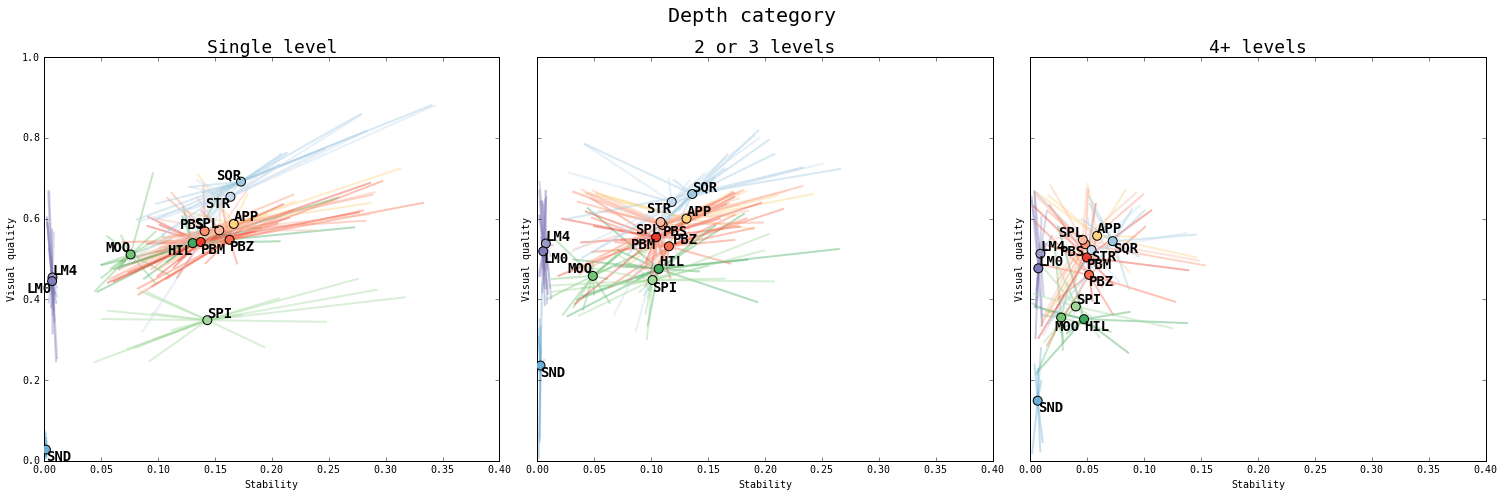

In [17]:
attrs = ['Single level', '2 or 3 levels', '4+ levels']

fig, _ = plt.subplots(1, len(attrs), sharex=True, sharey=True, figsize=(len(attrs) * 7, 7))
fig.suptitle('Depth category', fontsize=20)

for i, attr in enumerate(attrs):
    ax = fig.axes[i]
    ax.set_title(attr, fontsize=18)
    ax.set_xlabel('Stability')
    ax.set_ylabel('Visual quality')

    texts = []
    for i in range(len(attrs)):
        texts.append([])

    for technique in sorted(Globals.acronyms):
        df = averages[(averages['technique'] == Globals.acronyms[technique])]#.dropna(axis=0)
        df = df[(df['depthCategory'] == attr)]
#         display(df)
        colors = [Globals.tech_to_color[technique] for i in range(len(df['label'].values))]
        labels = Globals.acronyms[technique]
        
        x_mean = df['inst'].mean()
        y_mean = df['ar'].mean()

        for j, point in df.iterrows():
            x_line = [x_mean, point['inst']]
            y_line = [y_mean, point['ar']]

            if point['depthCategory'] == attr:
                ax.plot(x_line, y_line, c=colors[0], linewidth=2, zorder=1, alpha=.4)

        ax.scatter(x_mean, y_mean, s=80, c=colors, label=labels, linewidth=1, zorder=10)

        t = ax.text(x_mean, y_mean, Globals.acronyms[technique], ha='center', va='center', zorder=11,
                     fontsize=14, fontweight='bold')
        texts[i].append(t)
    adjust_text(texts[i], ax=ax, force_points=1, force_text=1, expand_points=(1,1), expand_text=(.3,.5))

    plt.xlim(xmin=0)
    plt.ylim(ymin=0, ymax=1)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()
os.makedirs('./modified_scatter', exist_ok=True)
fig.savefig('./modified_scatter/depthCategory-newcenters.png', dpi=400)

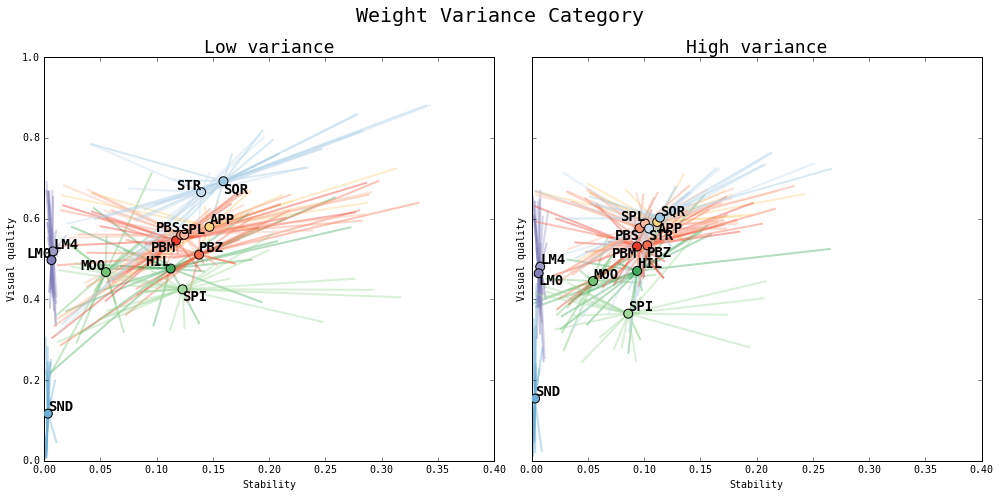

In [18]:
attrs = ['Low variance', 'High variance']

fig, _ = plt.subplots(1, len(attrs), sharex=True, sharey=True, figsize=(len(attrs) * 7, 7))
fig.suptitle('Weight Variance Category', fontsize=20)

for i, attr in enumerate(attrs):
    ax = fig.axes[i]
    
    if attr == 'Low variance':
        ax.set_title('Low weight variance', fontsize=18)
    elif attr == 'High variance':
        ax.set_title('High weight variance', fontsize=18)     
    
    ax.set_title(attr, fontsize=18)
    ax.set_xlabel('Stability')
    ax.set_ylabel('Visual quality')

    texts = []
    for i in range(len(attrs)):
        texts.append([])

    for technique in sorted(Globals.acronyms):
        df = averages[(averages['technique'] == Globals.acronyms[technique])]#.dropna(axis=0)
        df = df[(df['sizeVarianceCategory'] == attr)]

        colors = [Globals.tech_to_color[technique] for i in range(len(df['label'].values))]
        labels = Globals.acronyms[technique]

        x_mean = df['inst'].mean()
        y_mean = df['ar'].mean()

        for j, point in df.iterrows():
            x_line = [x_mean, point['inst']]
            y_line = [y_mean, point['ar']]

            if point['sizeVarianceCategory'] == attr:
                ax.plot(x_line, y_line, c=colors[0], linewidth=2, zorder=1, alpha=.4)

        ax.scatter(x_mean, y_mean, s=80, c=colors, label=labels, linewidth=1, zorder=10)

        t = ax.text(x_mean, y_mean, Globals.acronyms[technique], ha='center', va='center', zorder=11,
                     fontsize=14, fontweight='bold')
        texts[i].append(t)
    adjust_text(texts[i], ax=ax, force_points=0.2, force_text=0.2, expand_points=(1,1), expand_text=(.3,.5))

    plt.xlim(xmin=0)
    plt.ylim(ymin=0, ymax=1)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()
os.makedirs('./modified_scatter', exist_ok=True)
fig.savefig('./modified_scatter/varianceCategory-newcenters.png', dpi=400)

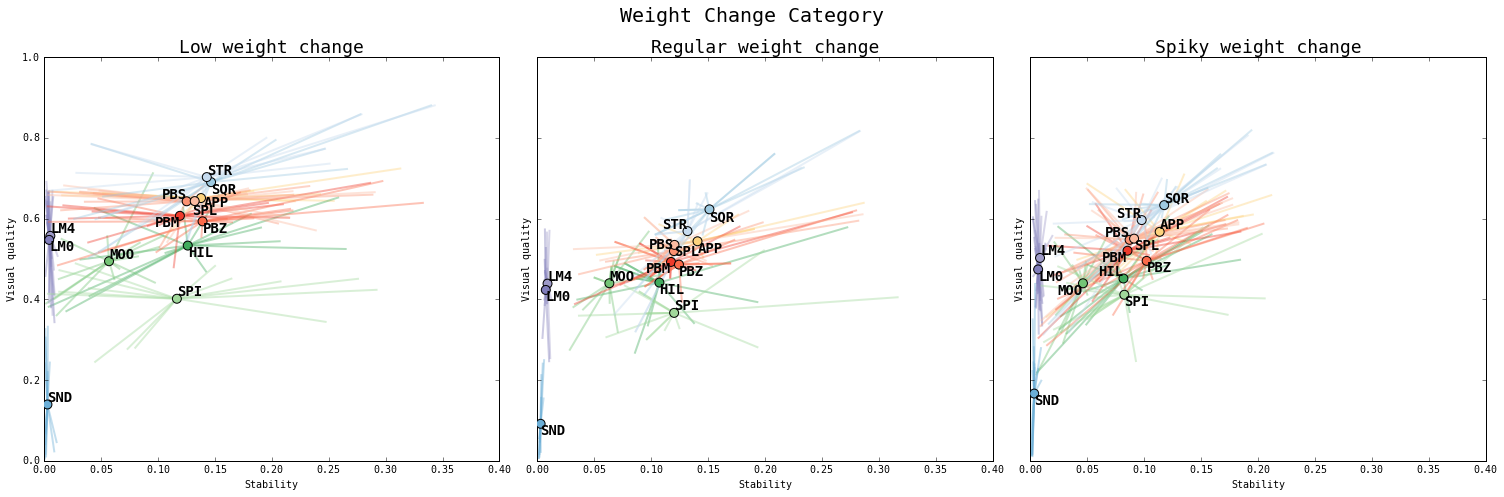

In [20]:
attrs = ['Low data change', 'Regular data change', 'Spiky data change']

fig, _ = plt.subplots(1, len(attrs), sharex=True, sharey=True, figsize=(len(attrs) * 7, 7))
fig.suptitle('Weight Change Category', fontsize=20)

for i, attr in enumerate(attrs):
    ax = fig.axes[i]
    ax.set_title(attr.replace('data', 'weight'), fontsize=18)
    ax.set_xlabel('Stability')
    ax.set_ylabel('Visual quality')

    texts = []
    for i in range(len(attrs)):
        texts.append([])

    for technique in sorted(Globals.acronyms):
        df = averages[(averages['technique'] == Globals.acronyms[technique])]#.dropna(axis=0)
        df = df[(df['dataChangeCategory'] == attr)]

        colors = [Globals.tech_to_color[technique] for i in range(len(df['label'].values))]
        labels = Globals.acronyms[technique]
      
        x_mean = df['inst'].mean()
        y_mean = df['ar'].mean()

        for j, point in df.iterrows():
            x_line = [x_mean, point['inst']]
            y_line = [y_mean, point['ar']]

            if point['dataChangeCategory'] == attr:
                ax.plot(x_line, y_line, c=colors[0], linewidth=2, zorder=1, alpha=.4)

        ax.scatter(x_mean, y_mean, s=80, c=colors, label=labels, linewidth=1, zorder=10)

        t = ax.text(x_mean, y_mean, Globals.acronyms[technique], ha='center', va='center', zorder=11,
                     fontsize=14, fontweight='bold')
        texts[i].append(t)
    adjust_text(texts[i], ax=ax, force_points=0.2, force_text=0.2, expand_points=(1,1), expand_text=(.3,.5))

    plt.xlim(xmin=0)
    plt.ylim(ymin=0, ymax=1)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()
os.makedirs('./modified_scatter', exist_ok=True)
fig.savefig('./modified_scatter/dataChangeCategory-newcenters.png', dpi=400)

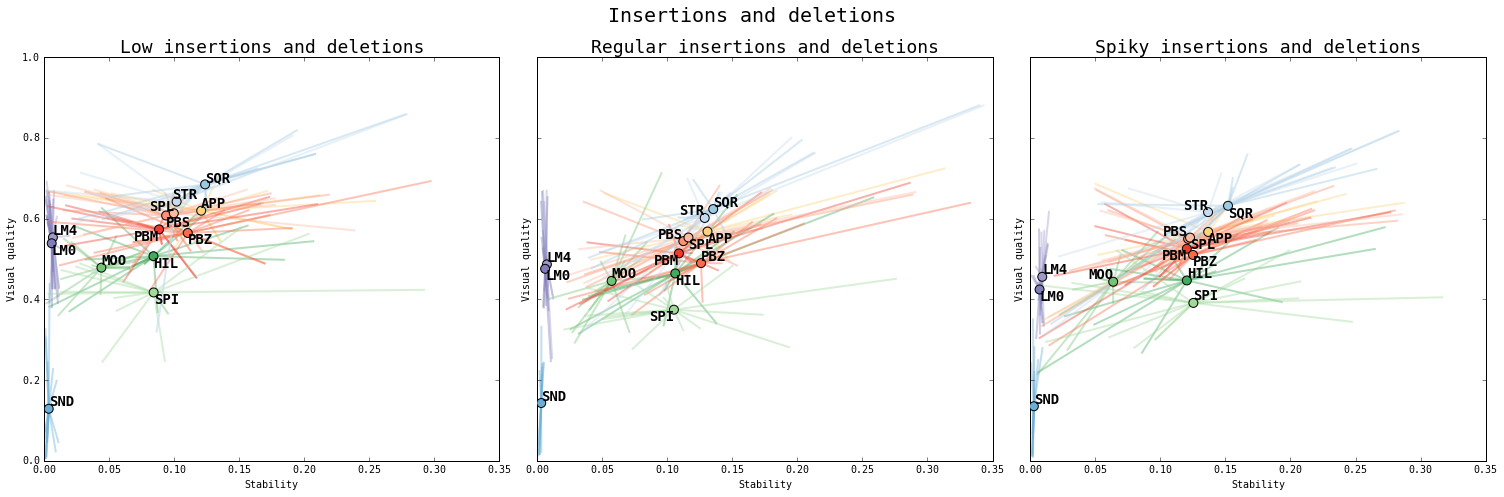

In [22]:
attrs = ['Low size change', 'Regular size change', 'Spiky size change']

fig, _ = plt.subplots(1, len(attrs), sharex=True, sharey=True, figsize=(len(attrs) * 7, 7))
fig.suptitle('Insertions and deletions', fontsize=20)

for i, attr in enumerate(attrs):
    ax = fig.axes[i]
    
    
    ax.set_title(attr.replace('size change', 'insertions and deletions'), fontsize=18)
    ax.set_xlabel('Stability')
    ax.set_ylabel('Visual quality')

    texts = []
    for i in range(len(attrs)):
        texts.append([])

    for technique in sorted(Globals.acronyms):
        df = averages[(averages['technique'] == Globals.acronyms[technique])]#.dropna(axis=0)
        df = df[(df['sizeChangeCategory'] == attr)]
        colors = [Globals.tech_to_color[technique] for i in range(len(df['label'].values))]
        labels = Globals.acronyms[technique]

        x_mean = df['inst'].mean()
        y_mean = df['ar'].mean()

        for j, point in df.iterrows():
            x_line = [x_mean, point['inst']]
            y_line = [y_mean, point['ar']]

            if point['sizeChangeCategory'] == attr:
                ax.plot(x_line, y_line, c=colors[0], linewidth=2, zorder=1, alpha=.4)
            else:
                ax.plot(x_line, y_line, c='#000000', zorder=1, alpha=.05)


        ax.scatter(x_mean, y_mean, s=80, c=colors, label=labels, linewidth=1, zorder=10)

        t = ax.text(x_mean, y_mean, Globals.acronyms[technique], ha='center', va='center', zorder=11,
                     fontsize=14, fontweight='bold')
        texts[i].append(t)
    adjust_text(texts[i], ax=ax, force_points=0.2, force_text=0.2, expand_points=(1,1), expand_text=(.3,.5))

    plt.xlim(xmin=0)
    plt.ylim(ymin=0, ymax=1)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()
os.makedirs('./modified_scatter', exist_ok=True)
fig.savefig('./modified_scatter/sizeChangeCategory-newcenters.png', dpi=400)